##Importing Libraries

In [ ]:
pip install mpl-finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import pandas_datareader.data as web
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from math import sqrt
import timeit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##Loading the Dataset

In [ ]:
#Loading Dataset
Data=pd.read_excel("/content/Data.xlsx")

In [ ]:
Data.shape

(2518, 8)

In [ ]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company_Name
0,2018-04-06,42.742500,43.119999,42.049999,42.095001,40.130054,140021200,Apple
1,2018-04-09,42.470001,43.272499,42.462502,42.512501,40.528065,116070800,Apple
2,2018-04-10,43.250000,43.500000,42.882500,43.312500,41.290710,113634400,Apple
3,2018-04-11,43.057499,43.480000,42.924999,43.110001,41.097672,89726400,Apple
4,2018-04-12,43.352501,43.750000,43.259998,43.535000,41.502827,91557200,Apple


In [ ]:
Data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Company_Name
2513,2023-03-30,284.230011,284.459991,281.480011,284.049988,284.049988,25053400,Microsoft
2514,2023-03-31,283.730011,289.269989,283.000000,288.299988,288.299988,32740300,Microsoft
2515,2023-04-03,286.519989,288.269989,283.950012,287.230011,287.230011,24883300,Microsoft
2516,2023-04-04,287.230011,290.450012,285.670013,287.179993,287.179993,25824300,Microsoft
2517,2023-04-05,285.850006,287.149994,282.920013,284.339996,284.339996,22028700,Microsoft


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2518 non-null   datetime64[ns]
 1   Open          2518 non-null   float64       
 2   High          2518 non-null   float64       
 3   Low           2518 non-null   float64       
 4   Close         2518 non-null   float64       
 5   Adj Close     2518 non-null   float64       
 6   Volume        2518 non-null   int64         
 7   Company_Name  2518 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 157.5+ KB


In [ ]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,152.889074,154.595639,151.171906,152.965004,150.326759,7.140523e+07
std,77.936514,78.739425,77.061783,77.939910,77.596140,5.711427e+07
min,35.994999,36.430000,35.500000,35.547501,34.257286,8.989200e+06
25%,99.292502,100.087502,97.932503,98.974998,94.976103,2.703315e+07
50%,140.389999,142.305000,138.709999,140.620002,138.550179,5.663645e+07
75%,213.100006,214.959999,210.352501,212.785000,208.003330,9.766228e+07
max,344.619995,349.670013,342.200012,343.109985,339.075562,4.265100e+08


In [ ]:
Data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Company_Name    0
dtype: int64

In [ ]:
Data.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Company_Name            object
dtype: object

#**Forecasting Model Building**

**Now we are going to get different RMSE scores using different models, this score gives average difference between the predicted traffic values and the actual traffic values in test data.**

**We will compare RMSE value that we will obtained from different models & then will pick the one which has lower value among all.**

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
#Train = df1.iloc[0:1850,0:11]
#Test = df1.iloc[1850:,0:11]

In [ ]:
df2=df1.loc[df1['Company']=='Apple']
df2.set_index('Date',inplace = True)
train = df2.loc[:'2018-06-29']['Close']
test = df2.loc['2022-01-25':]['Close']

In [ ]:
df2.head()

,Open,High,Low,Adj_Close,Volume,ma10,ma30,ma60,Company,Close
Date,,,,,,,,,,
2018-06-29,0.034273,0.033098,0.033347,0.032905,0.196305,0.028778,0.028298,0.016514,Apple,46.277500
2018-07-02,0.032272,0.033185,0.033763,0.034530,0.148342,0.028648,0.028322,0.016785,Apple,46.794998
2018-07-03,0.035488,0.033704,0.033860,0.031971,0.112162,0.028501,0.028218,0.016985,Apple,45.980000
2018-07-05,0.033439,0.032475,0.034464,0.033133,0.137544,0.028409,0.028168,0.017161,Apple,46.349998
2018-07-06,0.033568,0.034087,0.035214,0.035150,0.145985,0.028618,0.028157,0.017385,Apple,46.992500


In [ ]:
forecast_Value=900
train = df2.Close[:forecast_Value]
test = df2.Close[forecast_Value:1200]

In [ ]:
print("Length of train data is:",len(train))
print("Length of test data is:",len(test))

Length of train data is: 900
Length of test data is: 300


In [ ]:
train.head()

Date
2018-06-29    46.277500
2018-07-02    46.794998
2018-07-03    45.980000
2018-07-05    46.349998
2018-07-06    46.992500
Name: Close, dtype: float64

In [ ]:
test.tail()

Date
2023-03-30    162.360001
2023-03-31    164.899994
2023-04-03    166.169998
2023-04-04    165.630005
2023-04-05    163.759995
Name: Close, dtype: float64

#**ARIMA**

In [ ]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:

def get_scores(original,predicted,model_name):

    model_scores = {}

    rmse = np.sqrt(mean_squared_error(original, predicted))
    mae = mean_absolute_error(original, predicted)
    r2 = r2_score(original,predicted)
    model_scores[str(model_name)] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    return model_scores

In [ ]:
 from statsmodels.tsa.arima.model import ARIMA

# 1,0,2 ARIMA Model
model = ARIMA(df2['Close'], order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1200
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2718.308
Date:                Thu, 27 Apr 2023   AIC                           5446.616
Time:                        10:13:35   BIC                           5472.067
Sample:                             0   HQIC                          5456.203
                               - 1200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.3192     39.333      2.703      0.007      29.227     183.411
ar.L1          0.9992      0.001    706.460      0.000       0.996       1.002
ma.L1         -0.0564      0.022     -2.615      0.0

In [ ]:
 from statsmodels.tsa.arima.model import ARIMA

# 1,0,2 ARIMA Model
model = ARIMA(df2['Close'], order=(0,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1200
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2713.113
Date:                Thu, 27 Apr 2023   AIC                           5432.226
Time:                        10:13:35   BIC                           5447.493
Sample:                             0   HQIC                          5437.977
                               - 1200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0570      0.021     -2.652      0.008      -0.099      -0.015
ma.L2         -0.0283      0.022     -1.299      0.194      -0.071       0.014
sigma2         5.4072      0.144     37.642      0.0

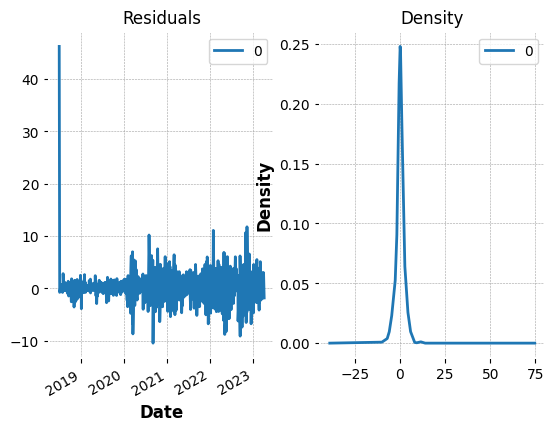

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

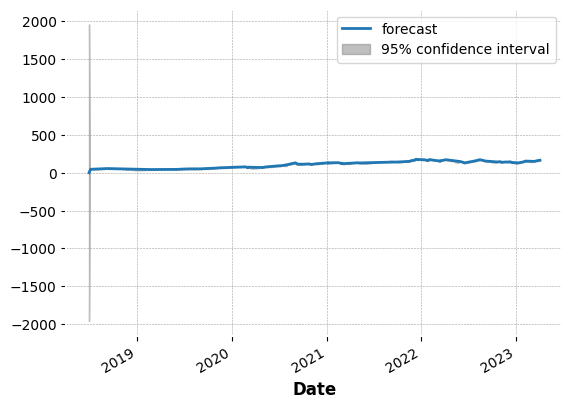

In [ ]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,dynamic=False,alpha=0.05)
plt.show()

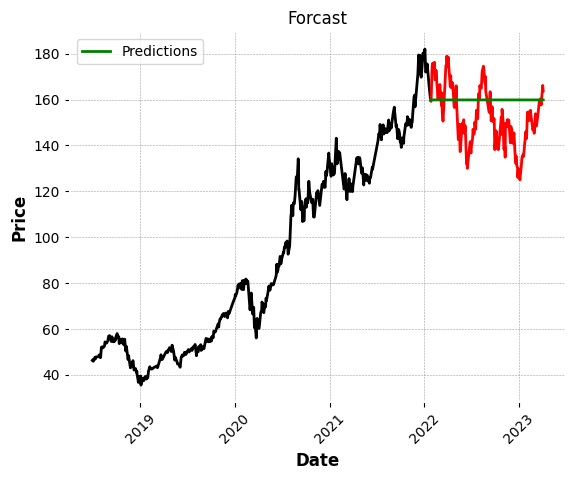

In [ ]:
model = ARIMA(train, order=(0, 1, 2))
fitted = model.fit()

y_pred = fitted.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = fitted.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Forcast")


plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

In [ ]:

def get_scores(original,predicted,model_name):

    model_scores = {}

    rmse = np.sqrt(mean_squared_error(original, predicted))
    mae = mean_absolute_error(original, predicted)
    r2 = r2_score(original,predicted)
    model_scores[str(model_name)] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
    return model_scores

In [ ]:
ar=get_scores(test,y_pred_out,"ARIMA")

RMSE: 14.343434425425585
MAE: 12.039457601786513
R2 Score: -0.34673551889223364


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.0 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
model = pm.auto_arima(df2["Close"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5431.441, Time=2.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5432.790, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5431.034, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5430.788, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5432.912, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5431.658, Time=1.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5433.342, Time=2.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5431.194, Time=0.45 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 8.105 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2712.394
Date:                Thu, 27 Apr 2023   AIC                           5430.788
Time:                        10:16:0

In [ ]:
smodel = pm.auto_arima(df2["Close"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=15.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=8162.059, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5872.799, Time=3.69 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=7172.843, Time=4.91 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=8187.838, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6173.303, Time=0.29 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5713.034, Time=7.09 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=16.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.05 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=8153.756, Time=7.20 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5712.632, Time=10.26 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=5872.451, Time=3.76 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=31.95 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=13.50 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1200
Model:             SARIMAX(2, 0, 3)x(2, 1, [], 12)   Log Likelihood               -2841.845
Date:                             Thu, 27 Apr 2023   AIC                           5701.690
Time:                                     10:26:49   BIC                           5747.410
Sample:                                          0   HQIC                          5718.921
                                            - 1200                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0093      0.005      1.952      0.051   -3.76e-05       0.019
ar.L1          1.9388      0.018    108.688      0.000       1.904       1.974
ar.L2         -0.9430      0.017    -55.624      0.000      -0.976      -0.910
ma.L1         -1.0414      0.027    -38.696      0.000      -1.094      -0.989
ma.L2          0.0409      0.032      1.267      0.205      -0.022       0.104
ma.L3          0.0549      0.025      2.241      0.025       0.007       0.103
ar.S.L12      -0.6724      0.022    -31.002      0.000      -0.715      -0.630
ar.S.L24      -0.3678      0.024    -15.532      0.000      -0.414      -0.321
sigma2         6.9404      0.198     34.973      0.000       6.551       7.329
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               298.19
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              10.67   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

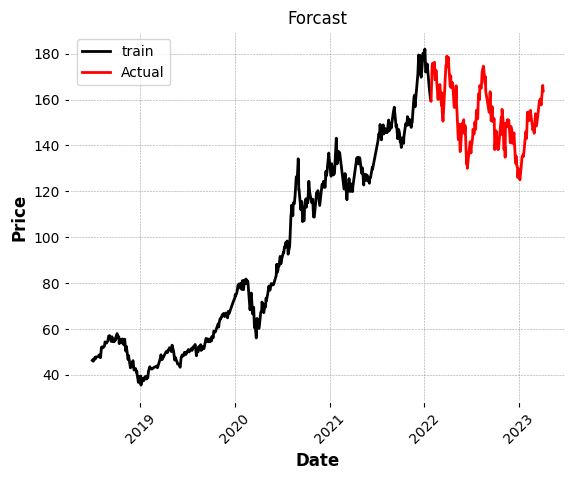

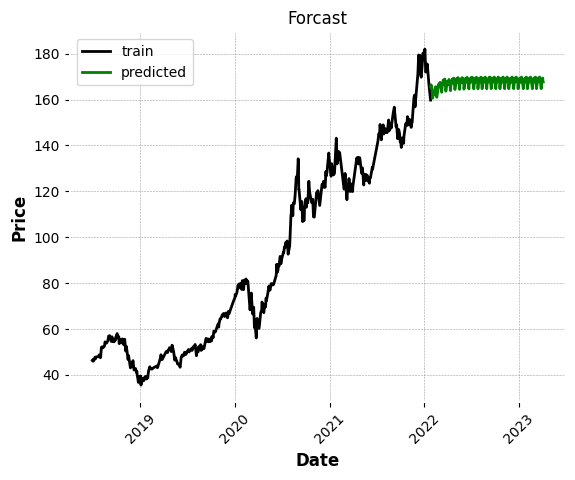

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
SARIMAXmodel = SARIMAX(test, order = (1, 0, 2), seasonal_order=(2,1,0,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train, color = "black",label = 'train')
plt.plot(test, color = "red", label = 'Actual')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Forcast")
plt.legend()
plt.show()

plt.plot(train, color = "black",label = 'train')
plt.plot(y_pred_out, color = "green", label = 'predicted')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Forcast")
plt.legend()
plt.show()

In [ ]:
sx=get_scores(test,y_pred_out,"SARIMAx")

RMSE: 19.082063008958954
MAE: 16.129835267876405
R2 Score: -1.3835631410391591


In [ ]:
merge={**ar,**sx}
print(merge)

{'ARIMA': [14.343434425425585, 12.039457601786513, -0.34673551889223364], 'SARIMAx': [19.082063008958954, 16.129835267876405, -1.3835631410391591]}


In [ ]:
model_scores_df=pd.DataFrame(merge,index=["RMSE","MAE","R2_SCORE"])
model_scores_df[:2].T

,RMSE,MAE
ARIMA,14.343434,12.039458
SARIMAx,19.082063,16.129835


<Axes: >

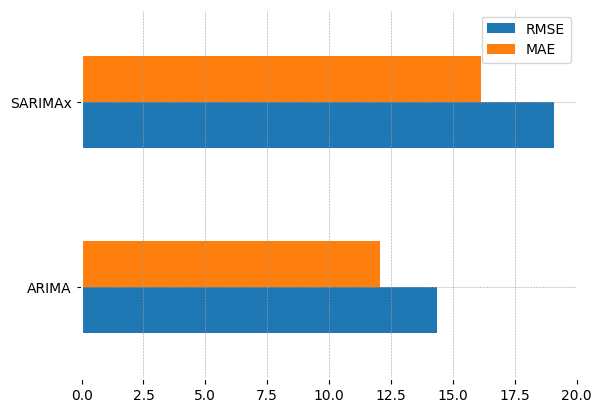

In [ ]:
model_scores_df[:2].T.plot(kind="barh")